# Proyek Analisis Data: Nama dataset
- Nama:Salsabila Faiha Puteri
- Email:salsabilafaihap@gmail.com
- Id Dicoding:salsabila_faiha_puteri_cyN4

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 Kapan jam puncak penggunaan sepeda terjadi dalam satu hari?
- pertanyaan 2 Bagaimana perbandingan jumlah pengguna sepeda casual dan pengguna sepeda terdaftar pada setiap harinya?

## Menyiapkan semua library yang dibutuhkan

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
df_day = pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [32]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [33]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value pada df_day

In [35]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value pada df_hour

In [36]:
df_day.duplicated().sum()

0

Tidak ditemukan duplikasi pada df_day

In [37]:
df_hour.duplicated().sum()

0

TIdak ditemukan duplikasi pada df_hour

### Cleaning Data

In [38]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

Mengonversi kolom "dteday" dalam DataFrame df_day menjadi tipe data datetime

In [39]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

Mengonversi kolom "dteday" dalam DataFrame df_hour menjadi tipe data datetime

In [40]:
print('df_day["dteday"] : ', df_day["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]


In [41]:
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_hour["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
df_day.describe(include="all")

<ipython-input-42-202ba9014e68>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


- Jumlah total baris dalam dataset adalah 731.
- Pada kolom "season," terdapat 4 musim dengan 731 nilai unik. Kolom "dteday" memiliki 731 nilai unik, yang menunjukkan bahwa setiap baris mewakili tanggal yang berbeda.
- Pada kolom "dteday," tanggal terbanyak adalah '2011-01-01' dengan frekuensi 1. Ini menunjukkan bahwa tidak ada tanggal yang muncul lebih dari satu kali.
- Pada kolom "temp," rata-rata temperatur adalah sekitar 0.5, dengan standar deviasi sekitar 0.18. Ini memberikan gambaran tentang sebaran data temperatur.
- Pada kolom "windspeed," kecepatan angin minimum adalah 0.022392 dan maksimum adalah 0.507463.
- Percentiles (25%, 50%, 75%) Memberikan gambaran tentang sebaran data pada beberapa titik persentil. Misalnya, pada kolom "registered," 75% data memiliki nilai kurang dari atau sama dengan 4776.5.

In [43]:
df_hour.describe(include="all")

<ipython-input-43-29824b046db5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_hour.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


-  Jumlah total baris dalam dataset adalah 17379.
- Pada kolom "dteday," terdapat 731 nilai unik, menunjukkan bahwa dataset ini mencakup periode selama dua tahun.
- Sejumlah 24 entri memiliki tanggal yang sama pada kolom "dteday."
- Pada kolom "dteday," tanggal terbanyak adalah '2011-01-01 00:00:00' dengan frekuensi 24. Ini menunjukkan bahwa tanggal tersebut muncul sebanyak 24 kali dalam dataset.
- Pada kolom "temp," rata-rata temperatur adalah sekitar 0.5, dengan standar deviasi sekitar 0.18. Ini memberikan gambaran tentang sebaran data temperatur.
- Pada kolom "windspeed," kecepatan angin minimum adalah 0.022392 dan maksimum adalah 0.8507.
- Percentiles (25%, 50%, 75%) memberikan gambaran tentang sebaran data pada beberapa titik persentil. Misalnya, pada kolom "registered," 75% data memiliki nilai kurang dari atau sama dengan 281.

In [44]:
df_day.groupby(by="season").agg({
    "instant": "nunique",
    "holiday": ["max", "min", "mean", "std"]
})

instant holiday                        
       nunique     max min      mean       std
season                                        
1          181       1   0  0.038674  0.193352
2          184       1   0  0.021739  0.146228
3          188       1   0  0.021277  0.144690
4          178       1   0  0.033708  0.180985

Mengelompokkan data berdasarkan kolom "season" pada DataFrame df_day. Setelah itu, dilakukan agregasi atau perhitungan statistik terhadap dua kolom, yaitu "instant" dan "holiday".

Hasil:
- Musim 1 dan Musim 4 memiliki nilai maksimum libur yang sama (1), sementara Musim 2 dan Musim 3 memiliki nilai maksimum yang lebih rendah (0).
- Rata-rata hari libur terendah ada di Musim 2, dan terendah kedua ada di Musim 3.
- Standar deviasi menunjukkan sejauh mana variasi data hari libur dalam setiap musim. Semakin tinggi nilai deviasi standar, semakin bervariasinya data. Musim 1 dan Musim 4 memiliki deviasi standar yang lebih tinggi dibandingkan dengan Musim 2 dan Musim 3.

1: Springer
2: Summer
3: Fall
4: Winter


In [45]:
df_day.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

Memberikan informasi tentang jumlah entri unik (hari unik) pada df_day untuk setiap hari dalam seminggu, dengan hasil diurutkan dari yang terbanyak ke yang terendah.

In [46]:
df_day.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    500
0    231
Name: instant, dtype: int64

Memberikan informasi tentang jumlah entri unik (hari unik) pada df_day untuk setiap kategori "workingday", dengan hasil diurutkan dari yang terbanyak ke yang terendah.

In [47]:
df_hour.groupby(by="hr").agg({
    "instant": "nunique",
    "holiday": ["max", "min", "mean", "std"]
})

instant holiday                        
   nunique     max min      mean       std
hr                                        
0      726       1   0  0.028926  0.167713
1      724       1   0  0.029006  0.167938
2      715       1   0  0.029371  0.168961
3      697       1   0  0.025825  0.158727
4      697       1   0  0.028694  0.167066
5      717       1   0  0.029289  0.168732
6      725       1   0  0.028966  0.167825
7      727       1   0  0.028886  0.167601
8      727       1   0  0.028886  0.167601
9      727       1   0  0.028886  0.167601
10     727       1   0  0.028886  0.167601
11     727       1   0  0.028886  0.167601
12     728       1   0  0.028846  0.167489
13     729       1   0  0.028807  0.167377
14     729       1   0  0.028807  0.167377
15     729       1   0  0.028807  0.167377
16     730       1   0  0.028767  0.167266
17     730       1   0  0.028767  0.167266
18     728       1   0  0.028846  0.167489
19     728       1   0  0.028846  0.167489
20     728       1   0  0.028846  0.167489
21     728       1   0  0.028846  0.167489
22     728       1   0  0.028846  0.167489
23     728       1   0  0.028846  0.167489

Mengelompokkan data pada tingkat jam (hr) dalam dataset df_hour dan kemudian melakukan beberapa agregasi statistik pada kolom "instant" dan "holiday" dalam setiap kelompok.

Hasil:
- Nilai maksimum hari libur adalah 1 untuk setiap jam, menunjukkan bahwa ada hari libur pada setiap jam.
- Rata-rata hari libur berkisar antara 0.0287 hingga 0.0294, menunjukkan bahwa sekitar 2.87% hingga 2.94% dari data pada setiap jam merupakan hari libur.
- Standar deviasi yang relatif kecil (antara 0.1587 hingga 0.1689) menunjukkan bahwa variasi data hari libur dalam sehari tidak terlalu besar.

0: Hari biasa
1: Hari libur

In [48]:
df_hour.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: instant, dtype: int64

Memberikan informasi tentang jumlah entri unik (hari unik) pada df_hour untuk setiap hari dalam seminggu, dengan hasil diurutkan dari yang terbanyak ke yang terendah.

In [49]:
df_hour.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    11865
0     5514
Name: instant, dtype: int64

Memberikan informasi tentang jumlah entri unik (hari unik) pada df_hour untuk setiap kategori "workingday", dengan hasil diurutkan dari yang terbanyak ke yang terendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan jam puncak penggunaan sepeda terjadi dalam satu hari?

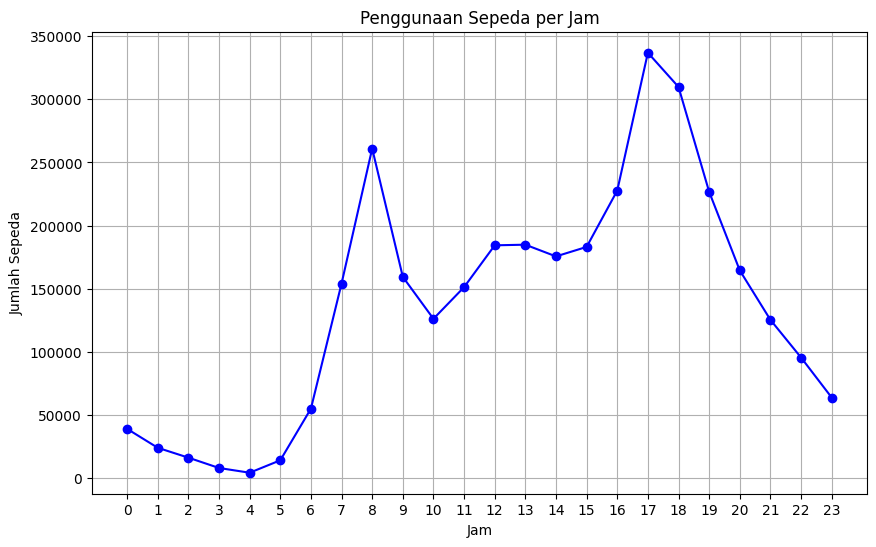

In [50]:
# Pengelompokan berdasarkan jam dan menghitung total penggunaan sepeda
hourly_usage = df_hour.groupby(by="hr").cnt.sum()

plt.figure(figsize=(10, 6))
plt.plot(hourly_usage.index, hourly_usage.values, marker='o', linestyle='-', color='b')
plt.title('Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda')
plt.xticks(hourly_usage.index)
plt.grid(True)
plt.show()


Berdasarkan visualisasi daiatas, dapat disimpulkan bahwa penggunaan sepeda per jam tertinggi terjadi pada pukul 17.00 dan 18.00 dengan jumlah sepeda diatas 300000 dan penggunaan terendah terjadi pada pukul 4.00 dengan jumlah mendekati angka 0.

Relevansi terhadap bisnis: Pemahaman terhadap jam-jam puncak penggunaan sepeda dapat membantu dalam manajemen stok sepeda. Pada jam-jam tersebut, perusahaan dapat menyiapkan lebih banyak sepeda untuk memenuhi tingginya permintaan.

### Pertanyaan 2: Bagaimana perbandingan jumlah pengguna sepeda casual dan pengguna sepeda terdaftar pada setiap harinya?

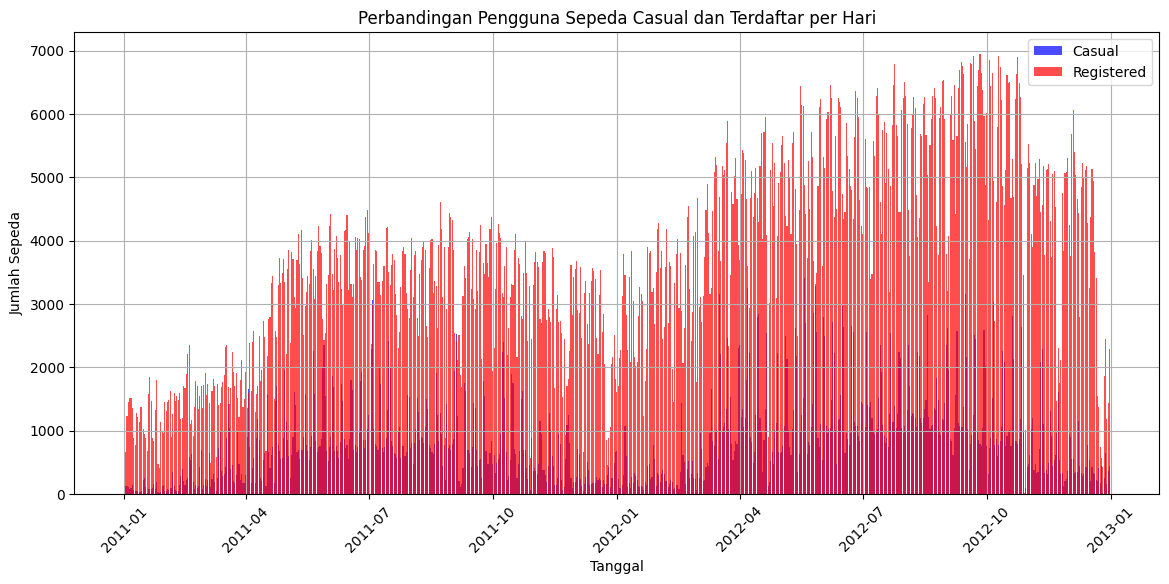

In [51]:
plt.figure(figsize=(14, 6))
plt.bar(df_day['dteday'], df_day['casual'], label='Casual', color='b', alpha=0.7)
plt.bar(df_day['dteday'], df_day['registered'], label='Registered', color='r', alpha=0.7)
plt.title('Perbandingan Pengguna Sepeda Casual dan Terdaftar per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Berdasarkan visualisasi diatas dapat disimpulkan bahwa rata-rata pengguna sepeda registered memiliki jumlah lebih tinggi dibandingkan dengan pengguna sepeda casual pada setiap bulannya. Pengguna sepeda registered tertinggi terjadi pada "2012-07" s/d "2012-10".

Relevansi terhadap bisnis: Menyesuaikan strategi pemasaran untuk lebih menargetkan dan mempertahankan pelanggan registered. Misalnya, memberikan insentif atau promosi khusus bagi pelanggan registered. Kemudian, mengetahui puncak penggunaan pada bulan-bulan tertentu, seperti "2012-07" hingga "2012-10", dapat menjadi fokus analisis untuk memahami faktor-faktor pendorong.


## Conclusion

- Conclusion pertanyaan 1

  Penggunaan sepeda per jam tertinggi terjadi pada pukul 17.00 dan 18.00 dengan jumlah sepeda diatas 300000 dan penggunaan terendah terjadi pada pukul 4.00 dengan jumlah mendekati angka 0.

- Conclusion pertanyaan 2

  Rata-rata pengguna sepeda registered memiliki jumlah lebih tinggi dibandingkan dengan pengguna sepeda casual pada setiap bulannya. Pengguna sepeda registered tertinggi terjadi pada "2012-07" s/d "2012-10".